To give you an idea of the performance difference, consider a NumPy array of one million integers, and the equivalent Python list:

In [1]:
import numpy as np
my_arr = np.arange(1000000)
my_list = list(range(1000000))

Now let’s multiply each sequence by 2:

In [2]:
%time for _ in range(10): my_arr2 = my_arr * 2

CPU times: user 15.7 ms, sys: 8.75 ms, total: 24.5 ms
Wall time: 28.9 ms


In [3]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

CPU times: user 1.22 s, sys: 244 ms, total: 1.47 s
Wall time: 1.52 s


# 4.1 The NumPy ndarray: A Multidimensional Array Object

One of the key features of NumPy is its **N-dimensional** array object, or ndarray, which is a fast, flexible container for large datasets in Python. Arrays enable you to perform mathematical operations on whole blocks of data using similar syntax to the equivalent operations between scalar elements

In [4]:
data = np.random.randn(2, 3)
data

array([[ 0.66840567, -0.28923228,  1.73246125],
       [ 1.22556321,  0.17500255, -0.62117952]])

I then write mathematical operations with data:

In [5]:
data * 10

array([[ 6.68405673, -2.89232278, 17.32461251],
       [12.25563209,  1.75002547, -6.21179518]])

In [6]:
data + data

array([[ 1.33681135, -0.57846456,  3.4649225 ],
       [ 2.45112642,  0.35000509, -1.24235904]])

An ndarray is a generic multidimensional container for homogeneous data; that is, **all of the elements must be the same type**

Every array has a shape, a tuple indicating the size of each dimension, and a dtype, an object describing the data type of the array:

In [7]:
data.shape

(2, 3)

In [8]:
data.dtype

dtype('float64')

## Creating ndarrays

The easiest way to create an array is to use the array function

This accepts any sequence-like object (including other arrays) and produces a new NumPy array con taining the passed data

For example, a list is a good candidate for conversion:

In [9]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

Nested sequences, like a list of equal-length lists, will be converted into a multidimen sional array:

In [10]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

Since data2 was a list of lists, the NumPy array arr2 has two dimensions with shape inferred from the data

We can confirm this by inspecting the ndim and shape attributes:

In [11]:
arr2.ndim

2

In [12]:
arr2.shape

(2, 4)

Unless explicitly specified (more on this later), np.array tries to infer a good data type for the array that it creates

The data type is stored in a special dtype metadata object; for example, in the previous two examples we have:

In [13]:
arr1.dtype

dtype('float64')

In [14]:
arr2.dtype

dtype('int64')

zeros and ones create arrays of 0s or 1s, respectively, with a given length or shape. empty creates an array without initializing its values to any particular value

In [15]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

It’s not safe to assume that np.empty will return an array of all zeros. In some cases, it may return uninitialized “garbage” values

In [17]:
np.empty((2, 3, 2))

array([[[4.66209781e-310, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000]],

       [[0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000]]])

arange is an array-valued version of the built-in Python range function:

In [18]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

See Table 4-1 for a short list of standard array creation functions. Since NumPy is focused on numerical computing, the data type, if not specified, will in many cases be float64

Table 4-1. Array creation functions
<p align='center'>
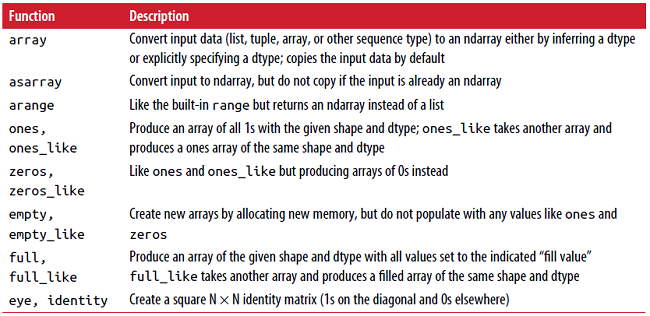
</p>

## Data Types for ndarrays

The data type or dtype is a special object containing **the information (or metadata, data about data) the ndarray needs to interpret a chunk of memory as a particular type of data**:

In [19]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)

In [20]:
arr1.dtype

dtype('float64')

In [21]:
arr2.dtype

dtype('int32')

See Table 4-2 for a full listing of NumPy’s supported data types

Table 4-2. NumPy data types
<p align='center'>
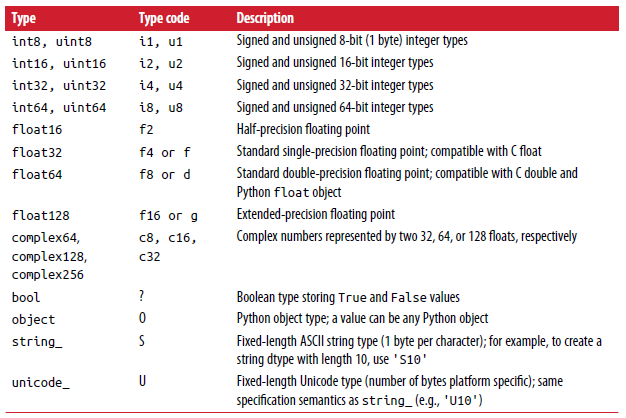
</p>

You can explicitly convert or cast an array from one dtype to another using ndarray’ astype method:

In [22]:
arr = np.array([1, 2, 3, 4, 5])

In [23]:
arr.dtype

dtype('int64')

In [24]:
float_arr = arr.astype(np.float64)

In [25]:
float_arr.dtype

dtype('float64')

In this example, integers were cast to floating point. **If I cast some floating-point numbers to be of integer dtype, the decimal part will be truncated:**

In [26]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])

In [27]:
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [28]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

If you have an array of **strings** representing numbers, you can use astype to convert them to **numeric** form:

In [29]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)

In [30]:
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

If casting were to fail for some reason (like a string that cannot be converted to float64), a ValueError will be raised

Here I was a bit lazy and wrote float instead of np .float64; **NumPy aliases the Python types to its own equivalent data dtypes**

In [31]:
int_array = np.arange(10)

In [32]:
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)

In [33]:
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

There are shorthand type code strings you can also use to refer to a dtype:

In [34]:
empty_uint32 = np.empty(8, dtype='u4')

In [35]:
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

Calling astype always creates a new array (a copy of the data), even if the new dtype is the same as the old dtype

## Arithmetic with NumPy Arrays

Arrays are important because they enable you to **express batch operations on data without writing any for loops. NumPy users call this vectorization**

Any arithmetic operations between equal-size arrays applies the operation element-wise:

In [36]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])

In [37]:
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [38]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [39]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

Arithmetic operations with scalars propagate the scalar argument to each element in the array:

In [40]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [41]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

Comparisons between arrays of the same size yield boolean arrays:

In [42]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])

In [43]:
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [44]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

Operations between differently sized arrays is called broadcasting

## Basic Indexing and Slicing

There are many ways you may want to select a subset of your data or individual elements

One-dimensional arrays are simple; on the surface they act similarly to Python lists:

In [45]:
arr = np.arange(10)

In [46]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [47]:
arr[5]

5

In [48]:
arr[5:8]

array([5, 6, 7])

In [49]:
arr[5:8] = 12

In [50]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

If you assign a scalar value to a slice, as in arr[5:8] = 12, the value is propageted (or broadcasted) to the entire selection

An important first distinction from Python’s built-in lists is that array slices are views on the original array. This means that **the data is not copied, and any modifications to the view will be reflected in the source array**

To give an example of this, I first create a slice of arr:

In [51]:
arr_slice = arr[5:8]

In [52]:
arr_slice

array([12, 12, 12])

Now, when I change values in arr_slice, the mutations are reflected in the original array arr:

In [53]:
arr_slice[1] = 12345

In [54]:
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

The “bare” slice [:] will assign to all values in an array:

In [55]:
arr_slice[:] = 64

In [56]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

If you want a copy of a slice of an ndarray instead of a view, you will need to explicitly copy the array

In [57]:
arr[5:8].copy()

array([64, 64, 64])

With higher dimensional arrays, you have many more options

In a two-dimensional array, the elements at each index are no longer scalars but rather one-dimensional arrays:

In [58]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [59]:
arr2d[2]

array([7, 8, 9])

Thus, individual elements can be accessed recursively

But that is a bit too much work, so you can pass a comma-separated list of indices to select individual elements. So these are equivalent



In [60]:
arr2d[0][2]

3

In [61]:
arr2d[0, 2]

3

See Figure 4-1 for an illustration of indexing on a two-dimensional array

<p align='center'>
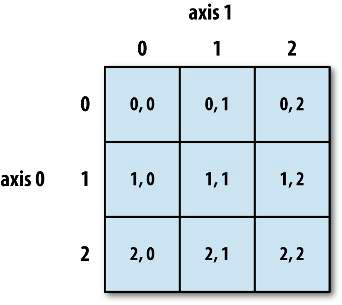
</p>

Figure 4-1. Indexing elements in a NumPy array

In multidimensional arrays, if you omit later indices, the returned object will be a lower dimensional ndarray consisting of all the data along the higher dimensions

So in the 2 x 2 x 3 array arr3d:

In [62]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

In [63]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

arr3d[0] is a 2 x 3 array

In [64]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

Both scalar values and arrays can be assigned to arr3d [0]:

In [65]:
old_values = arr3d[0].copy()

In [66]:
arr3d[0] = 42

In [67]:
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [68]:
arr3d[0] = old_values

In [69]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

Similarly, arr3d[1, 0] gives you all of the values whose indices start with (1, 0), forming a 1-dimensional array:

In [70]:
arr3d[1, 0]

array([7, 8, 9])

This expression is the same as though we had indexed in two steps:

In [71]:
x = arr3d[1]

In [72]:
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [73]:
x[0]

array([7, 8, 9])

### Indexing with slices

Like one-dimensional objects such as Python lists, ndarrays can be sliced with the familiar syntax:

In [74]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [75]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

Consider the two-dimensional array from before, arr2d. Slicing this array is a bit different:

In [76]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [84]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

As you can see, it has sliced along axis 0, the first axis

A slice, therefore, selects a range of elements along an axis. It can be helpful to read the expression **arr2d[:2] as “select the first two rows of arr2d.”**

You can pass multiple slices just like you can pass multiple indexes:

In [85]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

When slicing like this, you always obtain array views of the same number of dimensions

By mixing integer indexes and slices, you get lower dimensional slices

For example, I can select the second row but only the first two columns like so:

In [86]:
arr2d[1, :2]

array([4, 5])

Similarly, I can select the third column but only the first two rows like so:

In [87]:
arr2d[:2, 2]

array([3, 6])

See Figure 4-2 for an illustration. Note that **a colon by itself means to take the entire axis**, so you can slice only higher dimensional axes by doing:

In [88]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

Of course, assigning to a slice expression assigns to the whole selection:

In [90]:
arr2d[:2, 1:] = 0

In [91]:
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

<p align='center'>
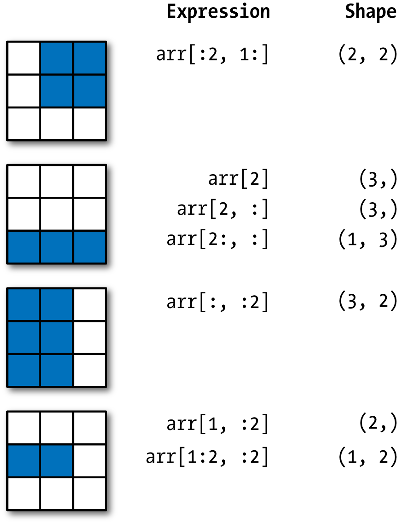
</p>
Figure 4-2. Two-dimensional array slicing

## Boolean Indexing

Let’s consider an example where we have some data in an array and an array of names with duplicates

I’m going to use here the randn.random function in numpy to generate some random normally distributed data:

In [92]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [101]:
data = np.random.randn(7, 4)

In [102]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [103]:
data

array([[-0.26788808,  0.53035547, -0.69166075, -0.39675353],
       [-0.6871727 , -0.84520564, -0.67124613, -0.0126646 ],
       [-1.11731035,  0.2344157 ,  1.65980218,  0.74204416],
       [-0.19183555, -0.88762896, -0.74715829,  1.6924546 ],
       [ 0.05080775, -0.63699565,  0.19091548,  2.10025514],
       [ 0.12015895,  0.61720311,  0.30017032, -0.35224985],
       [-1.1425182 , -0.34934272, -0.20889423,  0.58662319]])